In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/avis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


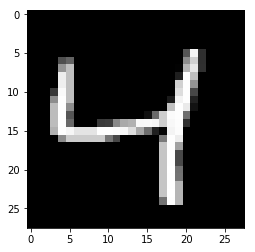

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')

In [23]:
encoding_dim = 32
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None,image_size), name= 'inputs')
targets_ = tf.placeholder(tf.float32, (None,image_size), name= 'targets')


encoded = tf.layers.dense(inputs_ , encoding_dim, activation=tf.nn.relu)
logits = tf.layers.dense(encoded, image_size, activation=None)

#========================== encoder pro===========================
encoded2 = tf.layers.dense(logits , encoding_dim, activation=tf.nn.relu)
logits2 = tf.layers.dense(encoded2, image_size, activation=None)

encoded3 = tf.layers.dense(logits2 , encoding_dim, activation=tf.nn.relu)
logits3 = tf.layers.dense(encoded3, image_size, activation=None)


decoded = tf.nn.sigmoid(logits3,name='output')
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_ , logits = logits3)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [24]:
sess = tf.Session()

In [25]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())

for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost,opt],feed_dict = feed)
        
        print("Epoch: {}/{} ..." . format(e+1,epochs),
             "Training loss: {:.4f}".format(batch_cost))
        

Epoch: 1/20 ... Training loss: 0.6932
Epoch: 1/20 ... Training loss: 0.6920
Epoch: 1/20 ... Training loss: 0.6899
Epoch: 1/20 ... Training loss: 0.6858
Epoch: 1/20 ... Training loss: 0.6787
Epoch: 1/20 ... Training loss: 0.6668
Epoch: 1/20 ... Training loss: 0.6511
Epoch: 1/20 ... Training loss: 0.6325
Epoch: 1/20 ... Training loss: 0.6160
Epoch: 1/20 ... Training loss: 0.5999
Epoch: 1/20 ... Training loss: 0.5823
Epoch: 1/20 ... Training loss: 0.5698
Epoch: 1/20 ... Training loss: 0.5396
Epoch: 1/20 ... Training loss: 0.5205
Epoch: 1/20 ... Training loss: 0.4982
Epoch: 1/20 ... Training loss: 0.4834
Epoch: 1/20 ... Training loss: 0.4640
Epoch: 1/20 ... Training loss: 0.4421
Epoch: 1/20 ... Training loss: 0.4168
Epoch: 1/20 ... Training loss: 0.4027
Epoch: 1/20 ... Training loss: 0.3942
Epoch: 1/20 ... Training loss: 0.3809
Epoch: 1/20 ... Training loss: 0.3627
Epoch: 1/20 ... Training loss: 0.3491
Epoch: 1/20 ... Training loss: 0.3452
Epoch: 1/20 ... Training loss: 0.3344
Epoch: 1/20 

Epoch: 1/20 ... Training loss: 0.2230
Epoch: 1/20 ... Training loss: 0.2378
Epoch: 1/20 ... Training loss: 0.2283
Epoch: 1/20 ... Training loss: 0.2328
Epoch: 1/20 ... Training loss: 0.2257
Epoch: 1/20 ... Training loss: 0.2273
Epoch: 1/20 ... Training loss: 0.2293
Epoch: 1/20 ... Training loss: 0.2251
Epoch: 1/20 ... Training loss: 0.2237
Epoch: 1/20 ... Training loss: 0.2240
Epoch: 1/20 ... Training loss: 0.2276
Epoch: 1/20 ... Training loss: 0.2314
Epoch: 1/20 ... Training loss: 0.2206
Epoch: 1/20 ... Training loss: 0.2206
Epoch: 1/20 ... Training loss: 0.2253
Epoch: 1/20 ... Training loss: 0.2260
Epoch: 1/20 ... Training loss: 0.2206
Epoch: 1/20 ... Training loss: 0.2210
Epoch: 1/20 ... Training loss: 0.2189
Epoch: 1/20 ... Training loss: 0.2228
Epoch: 1/20 ... Training loss: 0.2218
Epoch: 1/20 ... Training loss: 0.2144
Epoch: 1/20 ... Training loss: 0.2192
Epoch: 1/20 ... Training loss: 0.2200
Epoch: 1/20 ... Training loss: 0.2225
Epoch: 1/20 ... Training loss: 0.2145
Epoch: 1/20 

Epoch: 2/20 ... Training loss: 0.1692
Epoch: 2/20 ... Training loss: 0.1730
Epoch: 2/20 ... Training loss: 0.1774
Epoch: 2/20 ... Training loss: 0.1706
Epoch: 2/20 ... Training loss: 0.1646
Epoch: 2/20 ... Training loss: 0.1741
Epoch: 2/20 ... Training loss: 0.1705
Epoch: 2/20 ... Training loss: 0.1656
Epoch: 2/20 ... Training loss: 0.1678
Epoch: 2/20 ... Training loss: 0.1805
Epoch: 2/20 ... Training loss: 0.1697
Epoch: 2/20 ... Training loss: 0.1757
Epoch: 2/20 ... Training loss: 0.1663
Epoch: 2/20 ... Training loss: 0.1714
Epoch: 2/20 ... Training loss: 0.1678
Epoch: 2/20 ... Training loss: 0.1679
Epoch: 2/20 ... Training loss: 0.1716
Epoch: 2/20 ... Training loss: 0.1653
Epoch: 2/20 ... Training loss: 0.1703
Epoch: 2/20 ... Training loss: 0.1678
Epoch: 2/20 ... Training loss: 0.1668
Epoch: 2/20 ... Training loss: 0.1633
Epoch: 2/20 ... Training loss: 0.1661
Epoch: 2/20 ... Training loss: 0.1683
Epoch: 2/20 ... Training loss: 0.1794
Epoch: 2/20 ... Training loss: 0.1628
Epoch: 2/20 

Epoch: 3/20 ... Training loss: 0.1592
Epoch: 3/20 ... Training loss: 0.1573
Epoch: 3/20 ... Training loss: 0.1618
Epoch: 3/20 ... Training loss: 0.1536
Epoch: 3/20 ... Training loss: 0.1558
Epoch: 3/20 ... Training loss: 0.1546
Epoch: 3/20 ... Training loss: 0.1539
Epoch: 3/20 ... Training loss: 0.1509
Epoch: 3/20 ... Training loss: 0.1566
Epoch: 3/20 ... Training loss: 0.1550
Epoch: 3/20 ... Training loss: 0.1574
Epoch: 3/20 ... Training loss: 0.1582
Epoch: 3/20 ... Training loss: 0.1554
Epoch: 3/20 ... Training loss: 0.1506
Epoch: 3/20 ... Training loss: 0.1605
Epoch: 3/20 ... Training loss: 0.1562
Epoch: 3/20 ... Training loss: 0.1500
Epoch: 3/20 ... Training loss: 0.1652
Epoch: 3/20 ... Training loss: 0.1561
Epoch: 3/20 ... Training loss: 0.1541
Epoch: 3/20 ... Training loss: 0.1430
Epoch: 3/20 ... Training loss: 0.1560
Epoch: 3/20 ... Training loss: 0.1606
Epoch: 3/20 ... Training loss: 0.1588
Epoch: 3/20 ... Training loss: 0.1542
Epoch: 3/20 ... Training loss: 0.1582
Epoch: 3/20 

Epoch: 3/20 ... Training loss: 0.1459
Epoch: 3/20 ... Training loss: 0.1453
Epoch: 3/20 ... Training loss: 0.1472
Epoch: 3/20 ... Training loss: 0.1463
Epoch: 3/20 ... Training loss: 0.1488
Epoch: 3/20 ... Training loss: 0.1482
Epoch: 3/20 ... Training loss: 0.1520
Epoch: 3/20 ... Training loss: 0.1524
Epoch: 3/20 ... Training loss: 0.1451
Epoch: 3/20 ... Training loss: 0.1486
Epoch: 3/20 ... Training loss: 0.1454
Epoch: 3/20 ... Training loss: 0.1482
Epoch: 3/20 ... Training loss: 0.1489
Epoch: 3/20 ... Training loss: 0.1450
Epoch: 3/20 ... Training loss: 0.1486
Epoch: 3/20 ... Training loss: 0.1495
Epoch: 3/20 ... Training loss: 0.1500
Epoch: 3/20 ... Training loss: 0.1457
Epoch: 3/20 ... Training loss: 0.1478
Epoch: 3/20 ... Training loss: 0.1513
Epoch: 3/20 ... Training loss: 0.1516
Epoch: 3/20 ... Training loss: 0.1438
Epoch: 3/20 ... Training loss: 0.1424
Epoch: 3/20 ... Training loss: 0.1440
Epoch: 3/20 ... Training loss: 0.1450
Epoch: 4/20 ... Training loss: 0.1528
Epoch: 4/20 

Epoch: 4/20 ... Training loss: 0.1425
Epoch: 4/20 ... Training loss: 0.1442
Epoch: 4/20 ... Training loss: 0.1406
Epoch: 4/20 ... Training loss: 0.1389
Epoch: 4/20 ... Training loss: 0.1425
Epoch: 4/20 ... Training loss: 0.1446
Epoch: 4/20 ... Training loss: 0.1415
Epoch: 4/20 ... Training loss: 0.1413
Epoch: 4/20 ... Training loss: 0.1379
Epoch: 4/20 ... Training loss: 0.1447
Epoch: 4/20 ... Training loss: 0.1383
Epoch: 4/20 ... Training loss: 0.1398
Epoch: 4/20 ... Training loss: 0.1345
Epoch: 4/20 ... Training loss: 0.1366
Epoch: 4/20 ... Training loss: 0.1401
Epoch: 4/20 ... Training loss: 0.1372
Epoch: 4/20 ... Training loss: 0.1388
Epoch: 4/20 ... Training loss: 0.1397
Epoch: 4/20 ... Training loss: 0.1388
Epoch: 4/20 ... Training loss: 0.1424
Epoch: 4/20 ... Training loss: 0.1417
Epoch: 4/20 ... Training loss: 0.1418
Epoch: 4/20 ... Training loss: 0.1327
Epoch: 4/20 ... Training loss: 0.1425
Epoch: 4/20 ... Training loss: 0.1372
Epoch: 4/20 ... Training loss: 0.1352
Epoch: 4/20 

Epoch: 5/20 ... Training loss: 0.1378
Epoch: 5/20 ... Training loss: 0.1389
Epoch: 5/20 ... Training loss: 0.1373
Epoch: 5/20 ... Training loss: 0.1383
Epoch: 5/20 ... Training loss: 0.1334
Epoch: 5/20 ... Training loss: 0.1330
Epoch: 5/20 ... Training loss: 0.1312
Epoch: 5/20 ... Training loss: 0.1301
Epoch: 5/20 ... Training loss: 0.1368
Epoch: 5/20 ... Training loss: 0.1389
Epoch: 5/20 ... Training loss: 0.1366
Epoch: 5/20 ... Training loss: 0.1381
Epoch: 5/20 ... Training loss: 0.1329
Epoch: 5/20 ... Training loss: 0.1352
Epoch: 5/20 ... Training loss: 0.1340
Epoch: 5/20 ... Training loss: 0.1345
Epoch: 5/20 ... Training loss: 0.1371
Epoch: 5/20 ... Training loss: 0.1290
Epoch: 5/20 ... Training loss: 0.1400
Epoch: 5/20 ... Training loss: 0.1314
Epoch: 5/20 ... Training loss: 0.1347
Epoch: 5/20 ... Training loss: 0.1334
Epoch: 5/20 ... Training loss: 0.1399
Epoch: 5/20 ... Training loss: 0.1297
Epoch: 5/20 ... Training loss: 0.1329
Epoch: 5/20 ... Training loss: 0.1309
Epoch: 5/20 

Epoch: 6/20 ... Training loss: 0.1279
Epoch: 6/20 ... Training loss: 0.1278
Epoch: 6/20 ... Training loss: 0.1387
Epoch: 6/20 ... Training loss: 0.1293
Epoch: 6/20 ... Training loss: 0.1338
Epoch: 6/20 ... Training loss: 0.1280
Epoch: 6/20 ... Training loss: 0.1296
Epoch: 6/20 ... Training loss: 0.1342
Epoch: 6/20 ... Training loss: 0.1330
Epoch: 6/20 ... Training loss: 0.1288
Epoch: 6/20 ... Training loss: 0.1308
Epoch: 6/20 ... Training loss: 0.1327
Epoch: 6/20 ... Training loss: 0.1273
Epoch: 6/20 ... Training loss: 0.1317
Epoch: 6/20 ... Training loss: 0.1314
Epoch: 6/20 ... Training loss: 0.1307
Epoch: 6/20 ... Training loss: 0.1318
Epoch: 6/20 ... Training loss: 0.1266
Epoch: 6/20 ... Training loss: 0.1326
Epoch: 6/20 ... Training loss: 0.1303
Epoch: 6/20 ... Training loss: 0.1272
Epoch: 6/20 ... Training loss: 0.1341
Epoch: 6/20 ... Training loss: 0.1332
Epoch: 6/20 ... Training loss: 0.1310
Epoch: 6/20 ... Training loss: 0.1302
Epoch: 6/20 ... Training loss: 0.1292
Epoch: 6/20 

Epoch: 6/20 ... Training loss: 0.1250
Epoch: 6/20 ... Training loss: 0.1307
Epoch: 6/20 ... Training loss: 0.1250
Epoch: 6/20 ... Training loss: 0.1331
Epoch: 6/20 ... Training loss: 0.1279
Epoch: 6/20 ... Training loss: 0.1314
Epoch: 6/20 ... Training loss: 0.1281
Epoch: 6/20 ... Training loss: 0.1343
Epoch: 6/20 ... Training loss: 0.1272
Epoch: 6/20 ... Training loss: 0.1282
Epoch: 6/20 ... Training loss: 0.1302
Epoch: 6/20 ... Training loss: 0.1306
Epoch: 6/20 ... Training loss: 0.1288
Epoch: 6/20 ... Training loss: 0.1268
Epoch: 6/20 ... Training loss: 0.1305
Epoch: 6/20 ... Training loss: 0.1338
Epoch: 6/20 ... Training loss: 0.1253
Epoch: 6/20 ... Training loss: 0.1258
Epoch: 6/20 ... Training loss: 0.1318
Epoch: 6/20 ... Training loss: 0.1288
Epoch: 6/20 ... Training loss: 0.1306
Epoch: 6/20 ... Training loss: 0.1256
Epoch: 6/20 ... Training loss: 0.1275
Epoch: 6/20 ... Training loss: 0.1312
Epoch: 6/20 ... Training loss: 0.1272
Epoch: 6/20 ... Training loss: 0.1270
Epoch: 6/20 

Epoch: 7/20 ... Training loss: 0.1309
Epoch: 7/20 ... Training loss: 0.1224
Epoch: 7/20 ... Training loss: 0.1260
Epoch: 7/20 ... Training loss: 0.1216
Epoch: 7/20 ... Training loss: 0.1299
Epoch: 7/20 ... Training loss: 0.1247
Epoch: 7/20 ... Training loss: 0.1271
Epoch: 7/20 ... Training loss: 0.1233
Epoch: 7/20 ... Training loss: 0.1279
Epoch: 7/20 ... Training loss: 0.1231
Epoch: 7/20 ... Training loss: 0.1318
Epoch: 7/20 ... Training loss: 0.1260
Epoch: 7/20 ... Training loss: 0.1298
Epoch: 7/20 ... Training loss: 0.1348
Epoch: 7/20 ... Training loss: 0.1301
Epoch: 7/20 ... Training loss: 0.1236
Epoch: 7/20 ... Training loss: 0.1303
Epoch: 7/20 ... Training loss: 0.1243
Epoch: 7/20 ... Training loss: 0.1309
Epoch: 7/20 ... Training loss: 0.1257
Epoch: 7/20 ... Training loss: 0.1297
Epoch: 7/20 ... Training loss: 0.1229
Epoch: 7/20 ... Training loss: 0.1276
Epoch: 7/20 ... Training loss: 0.1305
Epoch: 7/20 ... Training loss: 0.1276
Epoch: 7/20 ... Training loss: 0.1252
Epoch: 7/20 

Epoch: 8/20 ... Training loss: 0.1228
Epoch: 8/20 ... Training loss: 0.1272
Epoch: 8/20 ... Training loss: 0.1266
Epoch: 8/20 ... Training loss: 0.1211
Epoch: 8/20 ... Training loss: 0.1279
Epoch: 8/20 ... Training loss: 0.1272
Epoch: 8/20 ... Training loss: 0.1260
Epoch: 8/20 ... Training loss: 0.1247
Epoch: 8/20 ... Training loss: 0.1270
Epoch: 8/20 ... Training loss: 0.1261
Epoch: 8/20 ... Training loss: 0.1234
Epoch: 8/20 ... Training loss: 0.1276
Epoch: 8/20 ... Training loss: 0.1192
Epoch: 8/20 ... Training loss: 0.1257
Epoch: 8/20 ... Training loss: 0.1242
Epoch: 8/20 ... Training loss: 0.1248
Epoch: 8/20 ... Training loss: 0.1232
Epoch: 8/20 ... Training loss: 0.1252
Epoch: 8/20 ... Training loss: 0.1234
Epoch: 8/20 ... Training loss: 0.1311
Epoch: 8/20 ... Training loss: 0.1278
Epoch: 8/20 ... Training loss: 0.1241
Epoch: 8/20 ... Training loss: 0.1326
Epoch: 8/20 ... Training loss: 0.1235
Epoch: 8/20 ... Training loss: 0.1251
Epoch: 8/20 ... Training loss: 0.1262
Epoch: 8/20 

Epoch: 9/20 ... Training loss: 0.1220
Epoch: 9/20 ... Training loss: 0.1219
Epoch: 9/20 ... Training loss: 0.1247
Epoch: 9/20 ... Training loss: 0.1254
Epoch: 9/20 ... Training loss: 0.1190
Epoch: 9/20 ... Training loss: 0.1291
Epoch: 9/20 ... Training loss: 0.1246
Epoch: 9/20 ... Training loss: 0.1255
Epoch: 9/20 ... Training loss: 0.1238
Epoch: 9/20 ... Training loss: 0.1277
Epoch: 9/20 ... Training loss: 0.1256
Epoch: 9/20 ... Training loss: 0.1214
Epoch: 9/20 ... Training loss: 0.1247
Epoch: 9/20 ... Training loss: 0.1223
Epoch: 9/20 ... Training loss: 0.1192
Epoch: 9/20 ... Training loss: 0.1195
Epoch: 9/20 ... Training loss: 0.1253
Epoch: 9/20 ... Training loss: 0.1257
Epoch: 9/20 ... Training loss: 0.1205
Epoch: 9/20 ... Training loss: 0.1184
Epoch: 9/20 ... Training loss: 0.1206
Epoch: 9/20 ... Training loss: 0.1212
Epoch: 9/20 ... Training loss: 0.1215
Epoch: 9/20 ... Training loss: 0.1198
Epoch: 9/20 ... Training loss: 0.1228
Epoch: 9/20 ... Training loss: 0.1237
Epoch: 9/20 

Epoch: 9/20 ... Training loss: 0.1231
Epoch: 9/20 ... Training loss: 0.1268
Epoch: 9/20 ... Training loss: 0.1301
Epoch: 9/20 ... Training loss: 0.1195
Epoch: 9/20 ... Training loss: 0.1264
Epoch: 9/20 ... Training loss: 0.1233
Epoch: 9/20 ... Training loss: 0.1273
Epoch: 9/20 ... Training loss: 0.1231
Epoch: 9/20 ... Training loss: 0.1212
Epoch: 9/20 ... Training loss: 0.1236
Epoch: 9/20 ... Training loss: 0.1185
Epoch: 9/20 ... Training loss: 0.1197
Epoch: 9/20 ... Training loss: 0.1263
Epoch: 9/20 ... Training loss: 0.1222
Epoch: 9/20 ... Training loss: 0.1211
Epoch: 9/20 ... Training loss: 0.1216
Epoch: 9/20 ... Training loss: 0.1268
Epoch: 9/20 ... Training loss: 0.1205
Epoch: 9/20 ... Training loss: 0.1249
Epoch: 9/20 ... Training loss: 0.1253
Epoch: 9/20 ... Training loss: 0.1223
Epoch: 9/20 ... Training loss: 0.1212
Epoch: 9/20 ... Training loss: 0.1221
Epoch: 9/20 ... Training loss: 0.1259
Epoch: 9/20 ... Training loss: 0.1226
Epoch: 9/20 ... Training loss: 0.1249
Epoch: 9/20 

Epoch: 10/20 ... Training loss: 0.1205
Epoch: 10/20 ... Training loss: 0.1296
Epoch: 10/20 ... Training loss: 0.1279
Epoch: 10/20 ... Training loss: 0.1249
Epoch: 10/20 ... Training loss: 0.1257
Epoch: 10/20 ... Training loss: 0.1247
Epoch: 10/20 ... Training loss: 0.1210
Epoch: 10/20 ... Training loss: 0.1262
Epoch: 10/20 ... Training loss: 0.1197
Epoch: 10/20 ... Training loss: 0.1248
Epoch: 10/20 ... Training loss: 0.1209
Epoch: 10/20 ... Training loss: 0.1156
Epoch: 10/20 ... Training loss: 0.1152
Epoch: 10/20 ... Training loss: 0.1221
Epoch: 10/20 ... Training loss: 0.1235
Epoch: 10/20 ... Training loss: 0.1264
Epoch: 10/20 ... Training loss: 0.1221
Epoch: 10/20 ... Training loss: 0.1212
Epoch: 10/20 ... Training loss: 0.1203
Epoch: 10/20 ... Training loss: 0.1249
Epoch: 10/20 ... Training loss: 0.1203
Epoch: 10/20 ... Training loss: 0.1162
Epoch: 10/20 ... Training loss: 0.1231
Epoch: 10/20 ... Training loss: 0.1185
Epoch: 10/20 ... Training loss: 0.1222
Epoch: 10/20 ... Training

Epoch: 11/20 ... Training loss: 0.1247
Epoch: 11/20 ... Training loss: 0.1192
Epoch: 11/20 ... Training loss: 0.1206
Epoch: 11/20 ... Training loss: 0.1216
Epoch: 11/20 ... Training loss: 0.1174
Epoch: 11/20 ... Training loss: 0.1203
Epoch: 11/20 ... Training loss: 0.1205
Epoch: 11/20 ... Training loss: 0.1214
Epoch: 11/20 ... Training loss: 0.1232
Epoch: 11/20 ... Training loss: 0.1216
Epoch: 11/20 ... Training loss: 0.1201
Epoch: 11/20 ... Training loss: 0.1194
Epoch: 11/20 ... Training loss: 0.1205
Epoch: 11/20 ... Training loss: 0.1162
Epoch: 11/20 ... Training loss: 0.1258
Epoch: 11/20 ... Training loss: 0.1249
Epoch: 11/20 ... Training loss: 0.1237
Epoch: 11/20 ... Training loss: 0.1205
Epoch: 11/20 ... Training loss: 0.1238
Epoch: 11/20 ... Training loss: 0.1221
Epoch: 11/20 ... Training loss: 0.1242
Epoch: 11/20 ... Training loss: 0.1268
Epoch: 11/20 ... Training loss: 0.1229
Epoch: 11/20 ... Training loss: 0.1221
Epoch: 11/20 ... Training loss: 0.1262
Epoch: 11/20 ... Training

Epoch: 11/20 ... Training loss: 0.1165
Epoch: 11/20 ... Training loss: 0.1246
Epoch: 11/20 ... Training loss: 0.1252
Epoch: 11/20 ... Training loss: 0.1202
Epoch: 11/20 ... Training loss: 0.1203
Epoch: 11/20 ... Training loss: 0.1198
Epoch: 11/20 ... Training loss: 0.1190
Epoch: 11/20 ... Training loss: 0.1248
Epoch: 11/20 ... Training loss: 0.1212
Epoch: 11/20 ... Training loss: 0.1190
Epoch: 11/20 ... Training loss: 0.1175
Epoch: 11/20 ... Training loss: 0.1183
Epoch: 11/20 ... Training loss: 0.1194
Epoch: 11/20 ... Training loss: 0.1197
Epoch: 11/20 ... Training loss: 0.1173
Epoch: 11/20 ... Training loss: 0.1225
Epoch: 11/20 ... Training loss: 0.1192
Epoch: 11/20 ... Training loss: 0.1198
Epoch: 11/20 ... Training loss: 0.1223
Epoch: 11/20 ... Training loss: 0.1217
Epoch: 11/20 ... Training loss: 0.1203
Epoch: 11/20 ... Training loss: 0.1168
Epoch: 11/20 ... Training loss: 0.1192
Epoch: 11/20 ... Training loss: 0.1153
Epoch: 11/20 ... Training loss: 0.1185
Epoch: 11/20 ... Training

Epoch: 12/20 ... Training loss: 0.1171
Epoch: 12/20 ... Training loss: 0.1178
Epoch: 12/20 ... Training loss: 0.1206
Epoch: 12/20 ... Training loss: 0.1211
Epoch: 12/20 ... Training loss: 0.1253
Epoch: 12/20 ... Training loss: 0.1146
Epoch: 12/20 ... Training loss: 0.1160
Epoch: 12/20 ... Training loss: 0.1229
Epoch: 12/20 ... Training loss: 0.1178
Epoch: 12/20 ... Training loss: 0.1232
Epoch: 12/20 ... Training loss: 0.1154
Epoch: 12/20 ... Training loss: 0.1202
Epoch: 12/20 ... Training loss: 0.1179
Epoch: 12/20 ... Training loss: 0.1173
Epoch: 12/20 ... Training loss: 0.1231
Epoch: 12/20 ... Training loss: 0.1184
Epoch: 12/20 ... Training loss: 0.1215
Epoch: 12/20 ... Training loss: 0.1171
Epoch: 12/20 ... Training loss: 0.1194
Epoch: 12/20 ... Training loss: 0.1193
Epoch: 12/20 ... Training loss: 0.1184
Epoch: 12/20 ... Training loss: 0.1133
Epoch: 12/20 ... Training loss: 0.1178
Epoch: 12/20 ... Training loss: 0.1132
Epoch: 12/20 ... Training loss: 0.1213
Epoch: 12/20 ... Training

Epoch: 13/20 ... Training loss: 0.1169
Epoch: 13/20 ... Training loss: 0.1142
Epoch: 13/20 ... Training loss: 0.1154
Epoch: 13/20 ... Training loss: 0.1170
Epoch: 13/20 ... Training loss: 0.1149
Epoch: 13/20 ... Training loss: 0.1182
Epoch: 13/20 ... Training loss: 0.1223
Epoch: 13/20 ... Training loss: 0.1138
Epoch: 13/20 ... Training loss: 0.1190
Epoch: 13/20 ... Training loss: 0.1201
Epoch: 13/20 ... Training loss: 0.1192
Epoch: 13/20 ... Training loss: 0.1114
Epoch: 13/20 ... Training loss: 0.1188
Epoch: 13/20 ... Training loss: 0.1203
Epoch: 13/20 ... Training loss: 0.1137
Epoch: 13/20 ... Training loss: 0.1187
Epoch: 13/20 ... Training loss: 0.1157
Epoch: 13/20 ... Training loss: 0.1136
Epoch: 13/20 ... Training loss: 0.1154
Epoch: 13/20 ... Training loss: 0.1167
Epoch: 13/20 ... Training loss: 0.1155
Epoch: 13/20 ... Training loss: 0.1208
Epoch: 13/20 ... Training loss: 0.1195
Epoch: 13/20 ... Training loss: 0.1190
Epoch: 13/20 ... Training loss: 0.1188
Epoch: 13/20 ... Training

Epoch: 13/20 ... Training loss: 0.1168
Epoch: 13/20 ... Training loss: 0.1144
Epoch: 14/20 ... Training loss: 0.1214
Epoch: 14/20 ... Training loss: 0.1193
Epoch: 14/20 ... Training loss: 0.1160
Epoch: 14/20 ... Training loss: 0.1190
Epoch: 14/20 ... Training loss: 0.1178
Epoch: 14/20 ... Training loss: 0.1159
Epoch: 14/20 ... Training loss: 0.1201
Epoch: 14/20 ... Training loss: 0.1182
Epoch: 14/20 ... Training loss: 0.1193
Epoch: 14/20 ... Training loss: 0.1182
Epoch: 14/20 ... Training loss: 0.1124
Epoch: 14/20 ... Training loss: 0.1240
Epoch: 14/20 ... Training loss: 0.1154
Epoch: 14/20 ... Training loss: 0.1183
Epoch: 14/20 ... Training loss: 0.1122
Epoch: 14/20 ... Training loss: 0.1171
Epoch: 14/20 ... Training loss: 0.1207
Epoch: 14/20 ... Training loss: 0.1203
Epoch: 14/20 ... Training loss: 0.1179
Epoch: 14/20 ... Training loss: 0.1159
Epoch: 14/20 ... Training loss: 0.1172
Epoch: 14/20 ... Training loss: 0.1203
Epoch: 14/20 ... Training loss: 0.1174
Epoch: 14/20 ... Training

Epoch: 14/20 ... Training loss: 0.1192
Epoch: 14/20 ... Training loss: 0.1205
Epoch: 14/20 ... Training loss: 0.1170
Epoch: 14/20 ... Training loss: 0.1136
Epoch: 14/20 ... Training loss: 0.1179
Epoch: 14/20 ... Training loss: 0.1193
Epoch: 14/20 ... Training loss: 0.1159
Epoch: 14/20 ... Training loss: 0.1182
Epoch: 14/20 ... Training loss: 0.1164
Epoch: 14/20 ... Training loss: 0.1147
Epoch: 14/20 ... Training loss: 0.1152
Epoch: 14/20 ... Training loss: 0.1193
Epoch: 14/20 ... Training loss: 0.1136
Epoch: 14/20 ... Training loss: 0.1189
Epoch: 14/20 ... Training loss: 0.1176
Epoch: 14/20 ... Training loss: 0.1167
Epoch: 14/20 ... Training loss: 0.1131
Epoch: 14/20 ... Training loss: 0.1158
Epoch: 14/20 ... Training loss: 0.1221
Epoch: 14/20 ... Training loss: 0.1181
Epoch: 14/20 ... Training loss: 0.1109
Epoch: 14/20 ... Training loss: 0.1134
Epoch: 14/20 ... Training loss: 0.1159
Epoch: 14/20 ... Training loss: 0.1161
Epoch: 14/20 ... Training loss: 0.1162
Epoch: 14/20 ... Training

Epoch: 15/20 ... Training loss: 0.1173
Epoch: 15/20 ... Training loss: 0.1105
Epoch: 15/20 ... Training loss: 0.1157
Epoch: 15/20 ... Training loss: 0.1172
Epoch: 15/20 ... Training loss: 0.1168
Epoch: 15/20 ... Training loss: 0.1137
Epoch: 15/20 ... Training loss: 0.1148
Epoch: 15/20 ... Training loss: 0.1165
Epoch: 15/20 ... Training loss: 0.1166
Epoch: 15/20 ... Training loss: 0.1170
Epoch: 15/20 ... Training loss: 0.1129
Epoch: 15/20 ... Training loss: 0.1167
Epoch: 15/20 ... Training loss: 0.1161
Epoch: 15/20 ... Training loss: 0.1136
Epoch: 15/20 ... Training loss: 0.1197
Epoch: 15/20 ... Training loss: 0.1125
Epoch: 15/20 ... Training loss: 0.1152
Epoch: 15/20 ... Training loss: 0.1171
Epoch: 15/20 ... Training loss: 0.1147
Epoch: 15/20 ... Training loss: 0.1165
Epoch: 15/20 ... Training loss: 0.1182
Epoch: 15/20 ... Training loss: 0.1135
Epoch: 15/20 ... Training loss: 0.1193
Epoch: 15/20 ... Training loss: 0.1201
Epoch: 15/20 ... Training loss: 0.1203
Epoch: 15/20 ... Training

Epoch: 16/20 ... Training loss: 0.1165
Epoch: 16/20 ... Training loss: 0.1157
Epoch: 16/20 ... Training loss: 0.1186
Epoch: 16/20 ... Training loss: 0.1179
Epoch: 16/20 ... Training loss: 0.1144
Epoch: 16/20 ... Training loss: 0.1149
Epoch: 16/20 ... Training loss: 0.1198
Epoch: 16/20 ... Training loss: 0.1172
Epoch: 16/20 ... Training loss: 0.1217
Epoch: 16/20 ... Training loss: 0.1125
Epoch: 16/20 ... Training loss: 0.1131
Epoch: 16/20 ... Training loss: 0.1168
Epoch: 16/20 ... Training loss: 0.1139
Epoch: 16/20 ... Training loss: 0.1203
Epoch: 16/20 ... Training loss: 0.1164
Epoch: 16/20 ... Training loss: 0.1166
Epoch: 16/20 ... Training loss: 0.1203
Epoch: 16/20 ... Training loss: 0.1175
Epoch: 16/20 ... Training loss: 0.1166
Epoch: 16/20 ... Training loss: 0.1142
Epoch: 16/20 ... Training loss: 0.1240
Epoch: 16/20 ... Training loss: 0.1198
Epoch: 16/20 ... Training loss: 0.1165
Epoch: 16/20 ... Training loss: 0.1184
Epoch: 16/20 ... Training loss: 0.1135
Epoch: 16/20 ... Training

Epoch: 16/20 ... Training loss: 0.1195
Epoch: 16/20 ... Training loss: 0.1129
Epoch: 16/20 ... Training loss: 0.1117
Epoch: 16/20 ... Training loss: 0.1145
Epoch: 16/20 ... Training loss: 0.1181
Epoch: 16/20 ... Training loss: 0.1161
Epoch: 16/20 ... Training loss: 0.1172
Epoch: 16/20 ... Training loss: 0.1154
Epoch: 16/20 ... Training loss: 0.1163
Epoch: 16/20 ... Training loss: 0.1154
Epoch: 16/20 ... Training loss: 0.1152
Epoch: 16/20 ... Training loss: 0.1111
Epoch: 16/20 ... Training loss: 0.1188
Epoch: 16/20 ... Training loss: 0.1133
Epoch: 16/20 ... Training loss: 0.1167
Epoch: 16/20 ... Training loss: 0.1148
Epoch: 16/20 ... Training loss: 0.1143
Epoch: 16/20 ... Training loss: 0.1133
Epoch: 16/20 ... Training loss: 0.1113
Epoch: 16/20 ... Training loss: 0.1135
Epoch: 16/20 ... Training loss: 0.1157
Epoch: 16/20 ... Training loss: 0.1213
Epoch: 16/20 ... Training loss: 0.1181
Epoch: 16/20 ... Training loss: 0.1135
Epoch: 16/20 ... Training loss: 0.1105
Epoch: 16/20 ... Training

Epoch: 17/20 ... Training loss: 0.1161
Epoch: 17/20 ... Training loss: 0.1106
Epoch: 17/20 ... Training loss: 0.1199
Epoch: 17/20 ... Training loss: 0.1130
Epoch: 17/20 ... Training loss: 0.1108
Epoch: 17/20 ... Training loss: 0.1167
Epoch: 17/20 ... Training loss: 0.1169
Epoch: 17/20 ... Training loss: 0.1147
Epoch: 17/20 ... Training loss: 0.1132
Epoch: 17/20 ... Training loss: 0.1104
Epoch: 17/20 ... Training loss: 0.1165
Epoch: 17/20 ... Training loss: 0.1147
Epoch: 17/20 ... Training loss: 0.1165
Epoch: 17/20 ... Training loss: 0.1162
Epoch: 17/20 ... Training loss: 0.1127
Epoch: 17/20 ... Training loss: 0.1172
Epoch: 17/20 ... Training loss: 0.1132
Epoch: 17/20 ... Training loss: 0.1175
Epoch: 17/20 ... Training loss: 0.1175
Epoch: 17/20 ... Training loss: 0.1151
Epoch: 17/20 ... Training loss: 0.1142
Epoch: 17/20 ... Training loss: 0.1131
Epoch: 17/20 ... Training loss: 0.1161
Epoch: 17/20 ... Training loss: 0.1114
Epoch: 17/20 ... Training loss: 0.1192
Epoch: 17/20 ... Training

Epoch: 18/20 ... Training loss: 0.1168
Epoch: 18/20 ... Training loss: 0.1145
Epoch: 18/20 ... Training loss: 0.1152
Epoch: 18/20 ... Training loss: 0.1157
Epoch: 18/20 ... Training loss: 0.1124
Epoch: 18/20 ... Training loss: 0.1132
Epoch: 18/20 ... Training loss: 0.1158
Epoch: 18/20 ... Training loss: 0.1145
Epoch: 18/20 ... Training loss: 0.1200
Epoch: 18/20 ... Training loss: 0.1136
Epoch: 18/20 ... Training loss: 0.1168
Epoch: 18/20 ... Training loss: 0.1146
Epoch: 18/20 ... Training loss: 0.1114
Epoch: 18/20 ... Training loss: 0.1184
Epoch: 18/20 ... Training loss: 0.1114
Epoch: 18/20 ... Training loss: 0.1156
Epoch: 18/20 ... Training loss: 0.1092
Epoch: 18/20 ... Training loss: 0.1135
Epoch: 18/20 ... Training loss: 0.1108
Epoch: 18/20 ... Training loss: 0.1093
Epoch: 18/20 ... Training loss: 0.1153
Epoch: 18/20 ... Training loss: 0.1177
Epoch: 18/20 ... Training loss: 0.1140
Epoch: 18/20 ... Training loss: 0.1111
Epoch: 18/20 ... Training loss: 0.1120
Epoch: 18/20 ... Training

Epoch: 18/20 ... Training loss: 0.1139
Epoch: 18/20 ... Training loss: 0.1119
Epoch: 18/20 ... Training loss: 0.1106
Epoch: 18/20 ... Training loss: 0.1146
Epoch: 18/20 ... Training loss: 0.1133
Epoch: 18/20 ... Training loss: 0.1113
Epoch: 18/20 ... Training loss: 0.1167
Epoch: 19/20 ... Training loss: 0.1137
Epoch: 19/20 ... Training loss: 0.1149
Epoch: 19/20 ... Training loss: 0.1191
Epoch: 19/20 ... Training loss: 0.1163
Epoch: 19/20 ... Training loss: 0.1138
Epoch: 19/20 ... Training loss: 0.1145
Epoch: 19/20 ... Training loss: 0.1118
Epoch: 19/20 ... Training loss: 0.1147
Epoch: 19/20 ... Training loss: 0.1159
Epoch: 19/20 ... Training loss: 0.1144
Epoch: 19/20 ... Training loss: 0.1163
Epoch: 19/20 ... Training loss: 0.1153
Epoch: 19/20 ... Training loss: 0.1160
Epoch: 19/20 ... Training loss: 0.1098
Epoch: 19/20 ... Training loss: 0.1177
Epoch: 19/20 ... Training loss: 0.1183
Epoch: 19/20 ... Training loss: 0.1196
Epoch: 19/20 ... Training loss: 0.1090
Epoch: 19/20 ... Training

Epoch: 19/20 ... Training loss: 0.1126
Epoch: 19/20 ... Training loss: 0.1120
Epoch: 19/20 ... Training loss: 0.1144
Epoch: 19/20 ... Training loss: 0.1081
Epoch: 19/20 ... Training loss: 0.1149
Epoch: 19/20 ... Training loss: 0.1139
Epoch: 19/20 ... Training loss: 0.1158
Epoch: 19/20 ... Training loss: 0.1150
Epoch: 19/20 ... Training loss: 0.1096
Epoch: 19/20 ... Training loss: 0.1147
Epoch: 19/20 ... Training loss: 0.1093
Epoch: 19/20 ... Training loss: 0.1140
Epoch: 19/20 ... Training loss: 0.1148
Epoch: 19/20 ... Training loss: 0.1151
Epoch: 19/20 ... Training loss: 0.1136
Epoch: 19/20 ... Training loss: 0.1157
Epoch: 19/20 ... Training loss: 0.1147
Epoch: 19/20 ... Training loss: 0.1135
Epoch: 19/20 ... Training loss: 0.1116
Epoch: 19/20 ... Training loss: 0.1160
Epoch: 19/20 ... Training loss: 0.1136
Epoch: 19/20 ... Training loss: 0.1172
Epoch: 19/20 ... Training loss: 0.1146
Epoch: 19/20 ... Training loss: 0.1163
Epoch: 19/20 ... Training loss: 0.1138
Epoch: 19/20 ... Training

Epoch: 20/20 ... Training loss: 0.1160
Epoch: 20/20 ... Training loss: 0.1183
Epoch: 20/20 ... Training loss: 0.1151
Epoch: 20/20 ... Training loss: 0.1132
Epoch: 20/20 ... Training loss: 0.1143
Epoch: 20/20 ... Training loss: 0.1128
Epoch: 20/20 ... Training loss: 0.1114
Epoch: 20/20 ... Training loss: 0.1132
Epoch: 20/20 ... Training loss: 0.1166
Epoch: 20/20 ... Training loss: 0.1115
Epoch: 20/20 ... Training loss: 0.1130
Epoch: 20/20 ... Training loss: 0.1113
Epoch: 20/20 ... Training loss: 0.1126
Epoch: 20/20 ... Training loss: 0.1167
Epoch: 20/20 ... Training loss: 0.1148
Epoch: 20/20 ... Training loss: 0.1127
Epoch: 20/20 ... Training loss: 0.1129
Epoch: 20/20 ... Training loss: 0.1158
Epoch: 20/20 ... Training loss: 0.1170
Epoch: 20/20 ... Training loss: 0.1139
Epoch: 20/20 ... Training loss: 0.1119
Epoch: 20/20 ... Training loss: 0.1086
Epoch: 20/20 ... Training loss: 0.1151
Epoch: 20/20 ... Training loss: 0.1129
Epoch: 20/20 ... Training loss: 0.1115
Epoch: 20/20 ... Training

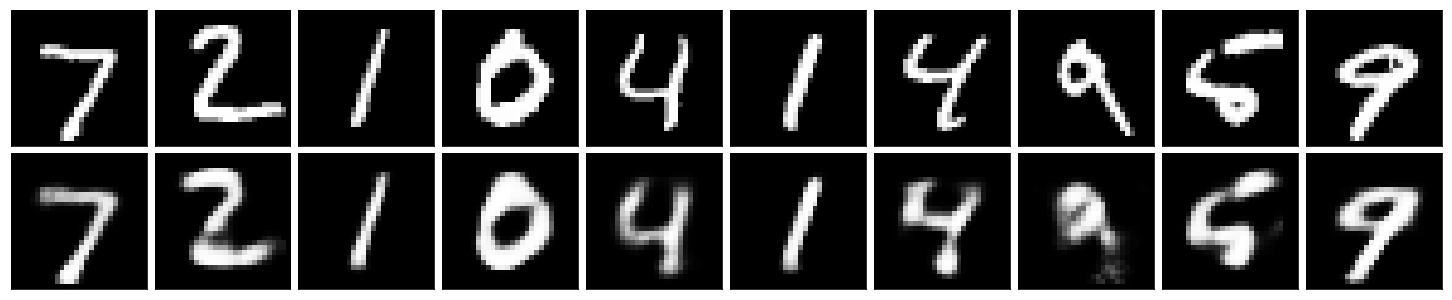

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_:in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)